In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#### IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

################# IMPORT HERE THE LIBs ################# 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hpc-workflow-data/execution_output.csv
/kaggle/input/montage-exectuion-output/montage_execution_output.csv
/kaggle/input/execution/execution_output.csv
/kaggle/input/blast-exectuion-output/blast_execution_output.csv
/kaggle/input/epigenomics-exectuion-output/epigenomics_execution_output.csv
/kaggle/input/superdf-workflow-exec/execution_output_1.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/montage-exectuion-output/montage_execution_output.csv', sep=',')

In [3]:
df2 = pd.read_csv('/kaggle/input/superdf-workflow-exec/execution_output_1.csv', sep=',')
df2 = df2.drop(columns = ['flops_per_task', 'memory_req_task', 'trace_size'])
df2.columns = ['run_id', 'host_name', 'num_of_cores', 'cores_allocated_task',
       'num_of_tasks', 'avg_task_execution', 'tasks_failed', 'compute_time',
       'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'completion_date', 'power']
df2.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-104,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
1,extk-104,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
2,extk-104,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,267.7030
3,extk-104,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
4,extk-104,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643


In [4]:
df_original = pd.concat([df1, df2], ignore_index = True)
df_original.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-96,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,50.0028
1,extk-96,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,50.0028
2,extk-96,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,578.6260
3,extk-96,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,56.2689
4,extk-96,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,50.0028


In [5]:
print(f'DF1 SHAPE: {df1.shape}')
print(f'DF2 SHAPE: {df2.shape}')
print(f'DF SHAPE: {df_original.shape}')

DF1 SHAPE: (50400, 15)
DF2 SHAPE: (41364, 15)
DF SHAPE: (91764, 15)


# Data Analisys

In [6]:
df_original.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-96,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,50.0028
1,extk-96,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,50.0028
2,extk-96,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,578.6260
3,extk-96,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,56.2689
4,extk-96,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,96,71.2167,0,6836.8,8.30096,1.39122,37084.7,18446744073709551520,18446744073709551520,177676.0,50.0028


In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91764 entries, 0 to 91763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   run_id                91764 non-null  object 
 1   host_name             91764 non-null  object 
 2   num_of_cores          91764 non-null  int64  
 3   cores_allocated_task  91764 non-null  object 
 4   num_of_tasks          91764 non-null  int64  
 5   avg_task_execution    91764 non-null  float64
 6   tasks_failed          91764 non-null  int64  
 7   compute_time          91764 non-null  float64
 8   io_input_time         91764 non-null  float64
 9   io_output_time        91764 non-null  float64
 10  comm_comp_ratio       91764 non-null  float64
 11  total_bytes_read      91764 non-null  uint64 
 12  total_bytes_write     91764 non-null  uint64 
 13  completion_date       91764 non-null  float64
 14  power                 91764 non-null  float64
dtypes: float64(7), int6

In [8]:
df_original.shape

(91764, 15)

In [9]:
df_original.dtypes

run_id                   object
host_name                object
num_of_cores              int64
cores_allocated_task     object
num_of_tasks              int64
avg_task_execution      float64
tasks_failed              int64
compute_time            float64
io_input_time           float64
io_output_time          float64
comm_comp_ratio         float64
total_bytes_read         uint64
total_bytes_write        uint64
completion_date         float64
power                   float64
dtype: object

In [10]:
df_numeric_types = df_original.select_dtypes(include = np.number)
df_numeric_types

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,28,96,71.216700,0,6836.8,8.300960,1.391220,37084.70,18446744073709551520,18446744073709551520,177676.0,50.0028
1,28,96,71.216700,0,6836.8,8.300960,1.391220,37084.70,18446744073709551520,18446744073709551520,177676.0,50.0028
2,28,96,71.216700,0,6836.8,8.300960,1.391220,37084.70,18446744073709551520,18446744073709551520,177676.0,578.6260
3,28,96,71.216700,0,6836.8,8.300960,1.391220,37084.70,18446744073709551520,18446744073709551520,177676.0,56.2689
4,28,96,71.216700,0,6836.8,8.300960,1.391220,37084.70,18446744073709551520,18446744073709551520,177676.0,50.0028
...,...,...,...,...,...,...,...,...,...,...,...,...
91759,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,790.5590
91760,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,789.7010
91761,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,50.0001
91762,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,50.0001


In [11]:
df_object_dtypes = df_original.select_dtypes(object)
df_object_dtypes

,run_id,host_name,cores_allocated_task
0,extk-96,BatchHeadNode,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
1,extk-96,CloudHeadNode,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
2,extk-96,CloudNode1,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
3,extk-96,CloudNode2,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
4,extk-96,CloudNode3,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
...,...,...,...
91759,extk-7398,Node6,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91760,extk-7398,Node7,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91761,extk-7398,Node8,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91762,extk-7398,Node9,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...


In [12]:
df_numeric_types.describe()

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
count,91764.0,91764.000000,91764.000000,91764.000000,91764.000000,91764.000000,91764.000000,9.176400e+04,9.176400e+04,9.176400e+04,9.176400e+04,91764.000000
mean,28.0,5868.748529,4.396569,18.797175,4204.133573,6.120979,0.546591,4.360174e+04,1.819345e+19,1.819345e+19,3.668781e+06,161.878860
std,0.0,3880.496650,97.509169,52.339869,3552.907799,21.435600,0.904240,2.809687e+05,2.146688e+18,2.146688e+18,1.471892e+07,233.805979
min,28.0,11.000000,0.000000,0.000000,0.000000,0.006505,0.006505,1.763680e-01,3.630000e+06,1.923999e+06,2.562760e+00,50.000000
25%,28.0,2488.000000,0.178312,0.000000,728.200000,0.006589,0.009350,4.462940e+03,1.844674e+19,1.844674e+19,5.834920e+05,50.000200
50%,28.0,5676.000000,0.614765,0.000000,6836.800000,8.300960,0.261732,7.657720e+03,1.844674e+19,1.844674e+19,1.566330e+06,50.000600
75%,28.0,8866.000000,1.238330,0.000000,6836.800000,8.300960,0.681573,2.272960e+04,1.844674e+19,1.844674e+19,3.427000e+06,52.666700
max,28.0,14036.000000,4886.130000,168.000000,64903.800000,533.818000,8.655740,6.432640e+06,1.844674e+19,1.844674e+19,5.470350e+08,792.881000


# Data Visualization

In [13]:
pastel_colors = sns.color_palette("pastel")

In [14]:
df_numeric_types.columns

Index(['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed',
       'compute_time', 'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'completion_date', 'power'],
      dtype='object')

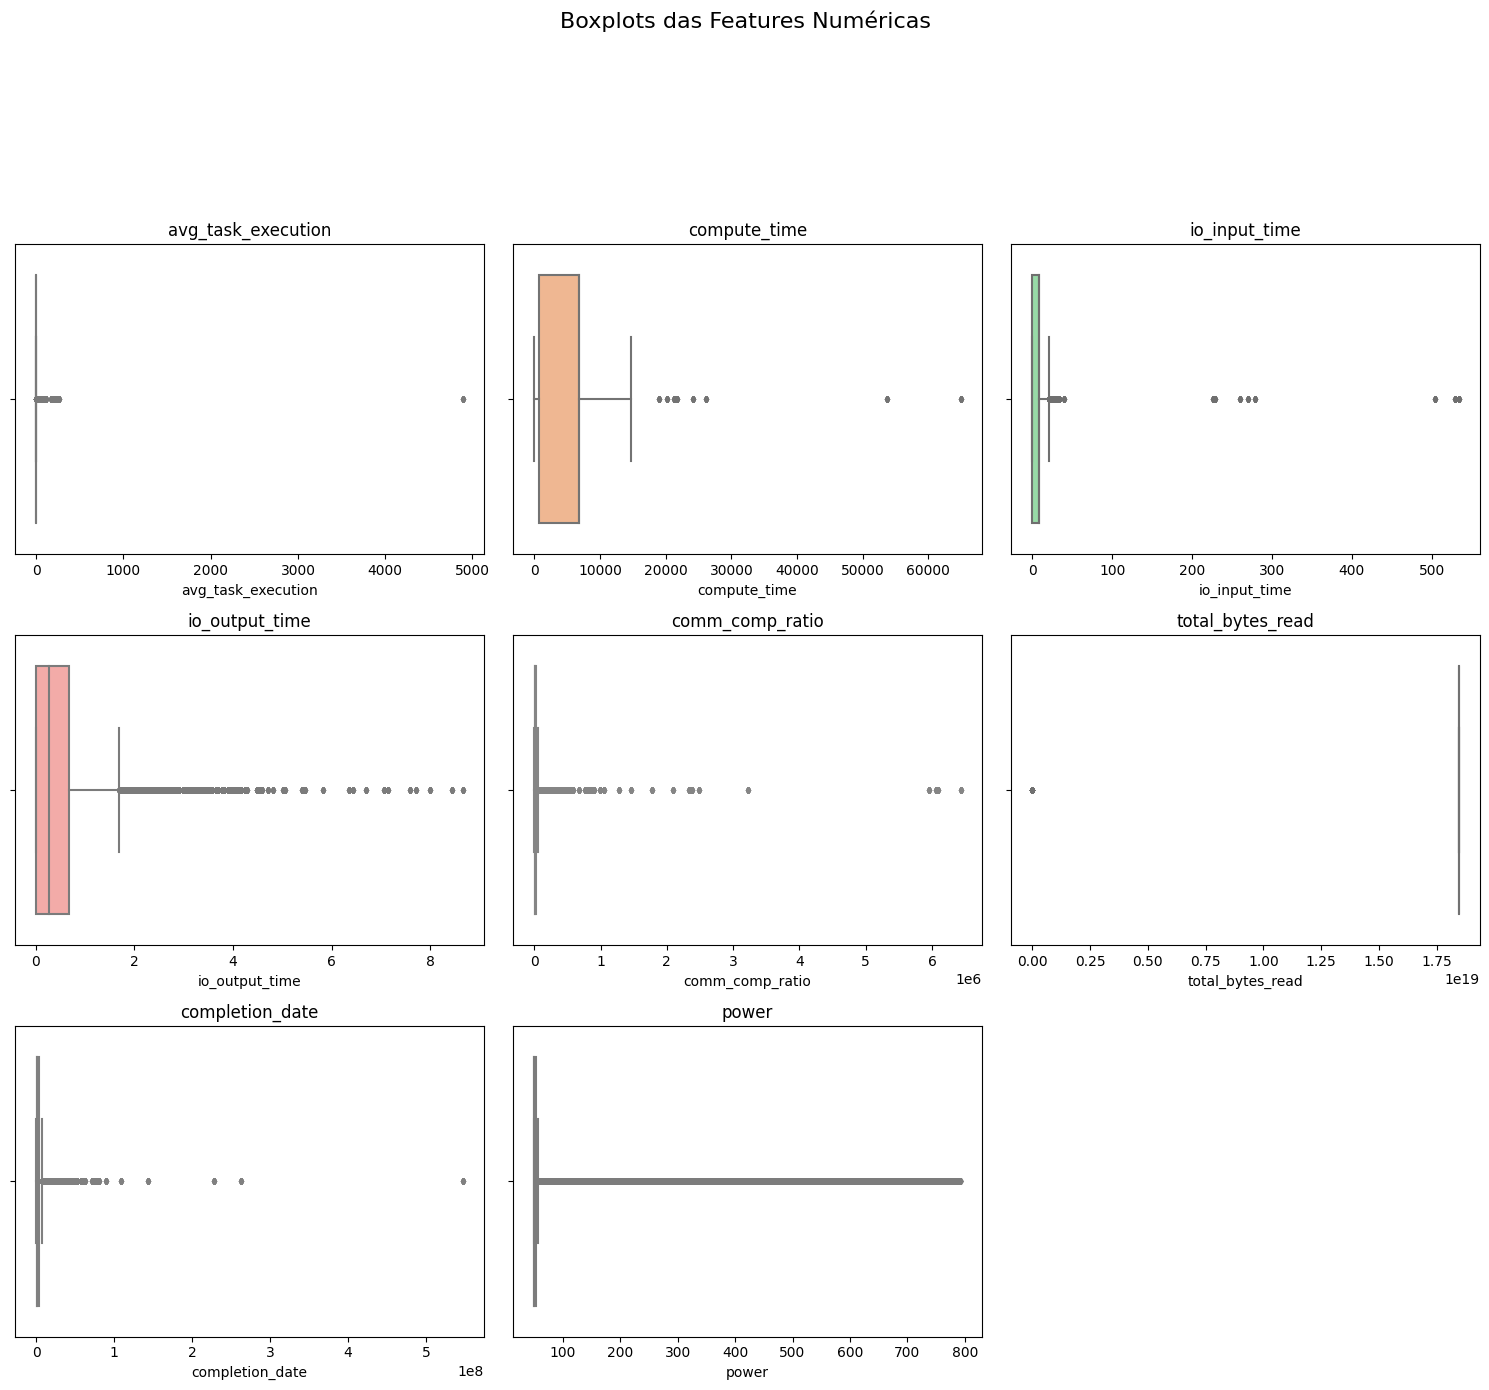

In [15]:
new_cols_features = df_numeric_types.drop(columns = ['num_of_cores', 'num_of_tasks', 'tasks_failed', 'total_bytes_write'])
columns_to_plot = new_cols_features.columns

num_features = len(columns_to_plot)

ncols_grid = min(num_features, 3)
nrows_grid = (num_features + ncols_grid - 1)

fig, axes = plt.subplots(nrows = nrows_grid, ncols = ncols_grid, figsize = (ncols_grid * 5, nrows_grid * 4))
fig.suptitle('Boxplots das Features Numéricas', fontsize=16, y=1.02)

if num_features == 1:
    axes_list = [axes]
else:
    axes_list = axes.flatten()
    
# Iterar sobre cada coluna e criar um boxplot em seu respectivo subplot
for i, col_name in enumerate(columns_to_plot):
    current_ax = axes_list[i]
    sns.boxplot(ax=axes_list[i], data=new_cols_features, x=col_name,
            color=pastel_colors[i], fliersize=3, linewidth=1.5)
    current_ax.set_title(f'{col_name}')

for j in range(num_features, len(axes_list)):
    fig.delaxes(axes_list[j])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

    

## Feature Engineering

In [16]:
df = df_original.copy()
chunk_size_original = 36

In [17]:
mask_extk = df['run_id'].str.startswith('extk', na=False)
mask_extk

0        True
1        True
2        True
3        True
4        True
         ... 
91759    True
91760    True
91761    True
91762    True
91763    True
Name: run_id, Length: 91764, dtype: bool

In [18]:
num_matched_rows = mask_extk.sum()
num_matched_rows

91764

In [19]:
if num_matched_rows > 0:
    group_ids = (np.arange(num_matched_rows) // chunk_size_original) + 1
    new_run_ids = 'simu-' + pd.Series(group_ids, dtype=str).values
    df.loc[mask_extk, 'run_id'] = new_run_ids

In [20]:
df['run_id'].str.startswith('simu-', na=False).sum()

91764

In [21]:
# agregando os dados por run_id
agg_df = df.groupby("run_id").agg({
    "host_name": "first",             # Nome do host (primeiro encontrado para o run_id)
    "num_of_cores": "sum",            # Total de núcleos usados na execução
    "cores_allocated_task": "sum",    # Soma dos núcleos alocados por tarefa
    "num_of_tasks": "first",          # Número de tarefas (mesmo valor para todas as entradas do run_id)
    "avg_task_execution": "first",    # Média de execução da tarefa (primeiro valor encontrado para o run_id)
    "tasks_failed": "sum",            # Total de tarefas falhas
    "compute_time": "mean",           # Tempo médio de computação
    "io_input_time": "sum",           # Tempo total de E/S de entrada
    "io_output_time": "sum",          # Tempo total de E/S de saída
    "comm_comp_ratio": "mean",        # Razão média entre comunicação e computação
    "total_bytes_read": "first",      # Total de bytes lidos (primeiro valor encontrado para o run_id)
    "total_bytes_write": "first",     # Total de bytes escritos (primeiro valor encontrado para o run_id)
    "power": 'sum',                   # Consumo total de energia
    "completion_date": "first"        # Data de conclusão (mesma para todas as entradas do run_id)
}).reset_index()

In [22]:
agg_df['cores_allocated_task'] = agg_df['cores_allocated_task'].str.split(';').apply(lambda x: [int(val) for val in x])
agg_df['sum_cores_allocated'] = agg_df['cores_allocated_task'].apply(sum)

In [23]:
df_numeric_types_agg = agg_df.select_dtypes(include = np.number)
df_numeric_types_agg

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,power,completion_date,sum_cores_allocated
0,1008,96,71.216700,0,6836.8,298.83456,50.083920,37084.7,18446744073709551520,18446744073709551520,2334.9901,177676.0,3771
1,1008,10061,0.679535,0,6836.8,307.73592,14.301540,16153.2,18446744073709541555,18446744073709541555,6444.7072,816977.0,362511
2,1008,10871,0.628903,0,6836.8,548.14320,61.988040,15571.4,18446744073709540745,18446744073709540745,8344.3186,603564.0,391671
3,1008,6361,1.074800,0,6836.8,401.33520,9.422352,21484.4,18446744073709545255,18446744073709545255,4020.5968,1185440.0,229311
4,1008,6386,1.070590,0,6836.8,298.83456,19.586880,22403.2,18446744073709545230,18446744073709545230,3536.5241,1506330.0,230211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,1008,6311,1.083310,0,6836.8,298.83456,9.422352,12192.3,18446744073709545305,18446744073709545305,6396.1810,518946.0,227511
2545,1008,6336,1.079040,0,6836.8,298.83456,34.108236,14899.5,18446744073709545280,18446744073709545280,4041.4788,1132660.0,228411
2546,1008,6331,1.079890,0,6836.8,298.83456,15.172560,22225.1,18446744073709545285,18446744073709545285,3371.2581,1665150.0,228231
2547,1008,6336,1.079040,0,6836.8,298.83456,43.016400,16666.7,18446744073709545280,18446744073709545280,5058.1312,773376.0,228411


# Pre-Processing

## Detection of outliers using the Interquartile Range (IQR)

### avg_task_execution

In [24]:
Q1_avg_task_execution = df_numeric_types_agg['avg_task_execution'].quantile(0.25)
Q3_avg_task_execution = df_numeric_types_agg['avg_task_execution'].quantile(0.75)

IQR = Q3_avg_task_execution - Q1_avg_task_execution
lower_limit = Q1_avg_task_execution - 1.5 * IQR
upper_limit = Q3_avg_task_execution + 1.5 * IQR

In [25]:
outlier_condition = (df_numeric_types_agg['avg_task_execution'] < lower_limit) | (df_numeric_types_agg['avg_task_execution'] > upper_limit)

In [26]:
no_outliers_values = df_numeric_types_agg.loc[~outlier_condition, 'avg_task_execution']
mean_replacement = no_outliers_values.mean()

In [27]:
df_numeric_types_agg_treated = df_numeric_types_agg.copy()
df_numeric_types_agg_treated.loc[outlier_condition, 'avg_task_execution'] = mean_replacement

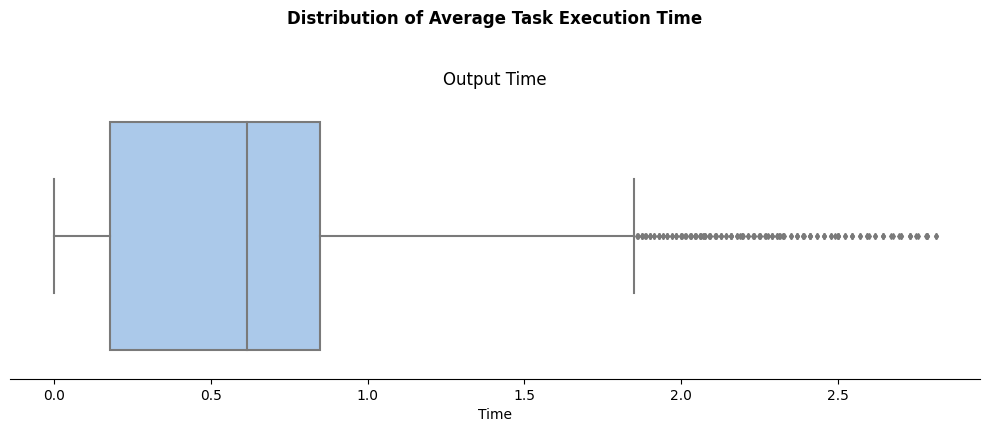

In [28]:
fig = plt.figure(figsize=(10, 4.5))

sns.boxplot(data=df_numeric_types_agg_treated, x='avg_task_execution',
            color=pastel_colors[0], fliersize=3, linewidth=1.5)
plt.title('Output Time')
plt.xlabel('Time')
plt.ylabel('')
plt.yticks([])

fig.suptitle('Distribution of Average Task Execution Time', fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine(left=True)
plt.show()

### comm_comp_ratio

In [29]:
Q1_comm_comp_ratio = df_numeric_types_agg['comm_comp_ratio'].quantile(0.25)
Q3_comm_comp_ratio = df_numeric_types_agg['comm_comp_ratio'].quantile(0.75)

IQR = Q3_comm_comp_ratio - Q1_comm_comp_ratio
lower_limit = Q1_comm_comp_ratio - 1.5 * IQR
upper_limit = Q3_comm_comp_ratio + 1.5 * IQR

In [30]:
outlier_condition = (df_numeric_types_agg['comm_comp_ratio'] < lower_limit) | (df_numeric_types_agg['comm_comp_ratio'] > upper_limit)

In [31]:
no_outliers_values = df_numeric_types_agg.loc[~outlier_condition, 'comm_comp_ratio']
mean_replacement = no_outliers_values.mean()

In [32]:
df_numeric_types_agg_treated.loc[outlier_condition, 'comm_comp_ratio'] = mean_replacement

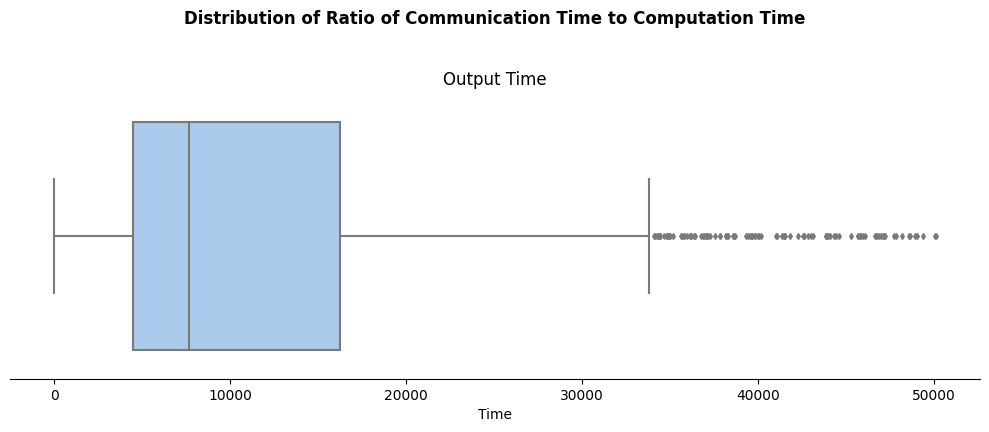

In [33]:
fig = plt.figure(figsize=(10, 4.5))

sns.boxplot(data=df_numeric_types_agg_treated, x='comm_comp_ratio',
            color=pastel_colors[0], fliersize=3, linewidth=1.5)
plt.title('Output Time')
plt.xlabel('Time')
plt.ylabel('')
plt.yticks([])

fig.suptitle('Distribution of Ratio of Communication Time to Computation Time', fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine(left=True)
plt.show()

### I/O TIME

In [34]:
# INPUT TIME
Q1_input = df_numeric_types_agg['io_input_time'].quantile(0.25)
Q3_input = df_numeric_types_agg['io_input_time'].quantile(0.75)
IQR_input = Q3_input - Q1_input
lower_limit_input = Q1_input - 1.5 * IQR_input
upper_limit_input = Q3_input + 1.5 * IQR_input

# OUTPUT TIME
Q1_output = df_numeric_types_agg['io_output_time'].quantile(0.25)
Q3_output = df_numeric_types_agg['io_output_time'].quantile(0.75)
IQR_output = Q3_output - Q1_output
lower_limit_output = Q1_output - 1.5 * IQR_output
upper_limit_output = Q3_output + 1.5 * IQR_output

In [35]:
# INPUT
outlier_condition_input = (df_numeric_types_agg['io_input_time'] < lower_limit_input) | (df_numeric_types_agg['io_input_time'] > upper_limit_input)

# OUTPUT
outlier_condition_output = (df_numeric_types_agg['io_output_time'] < lower_limit_output) | (df_numeric_types_agg['io_output_time'] > upper_limit_output)

In [36]:
# INPUT
no_outliers_values_input = df_numeric_types_agg.loc[~outlier_condition_input, 'io_input_time']
mean_replacement_input = no_outliers_values_input.mean()

# OUTPUT
no_outliers_values_output = df_numeric_types_agg.loc[~outlier_condition_output, 'io_output_time']
mean_replacement_output = no_outliers_values_output.mean()

In [37]:
# INPUT
df_numeric_types_agg_treated.loc[outlier_condition_input, 'io_input_time'] = mean_replacement_input

# OUTPUT
df_numeric_types_agg_treated.loc[outlier_condition_output, 'io_output_time'] = mean_replacement_output

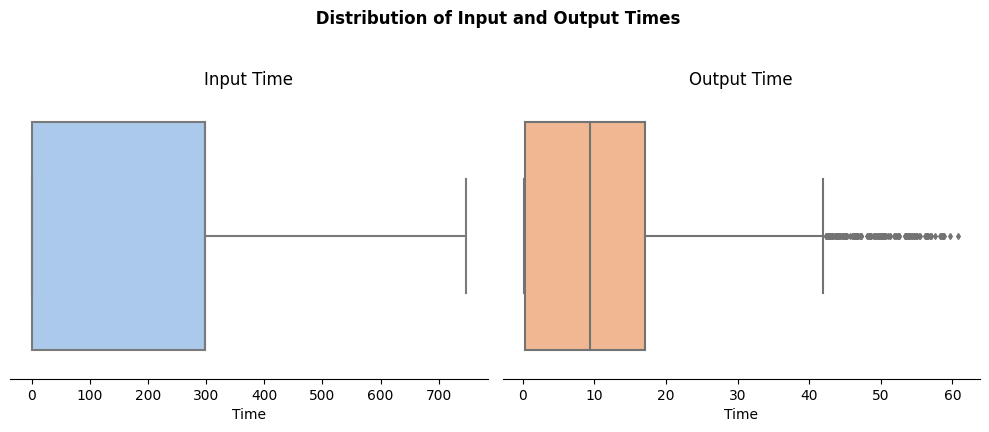

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

sns.boxplot(ax=axes[0], data=df_numeric_types_agg_treated, x='io_input_time',
            color=pastel_colors[0], fliersize=3, linewidth=1.5)
axes[0].set_title('Input Time')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('')
axes[0].set_yticks([])

sns.boxplot(ax=axes[1], data=df_numeric_types_agg_treated, x='io_output_time',
            color=pastel_colors[1], fliersize=3, linewidth=1.5)
axes[1].set_title('Output Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('')
axes[1].set_yticks([])

fig.suptitle(' Distribution of Input and Output Times', fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine(ax=axes[0], left=True)
sns.despine(ax=axes[1], left=True)
plt.show()

## Logarithmic Transformation

### power

In [39]:
df_numeric_types_agg_treated['power'] = df_numeric_types_agg_treated.loc[:, 'power'].apply(np.log10)

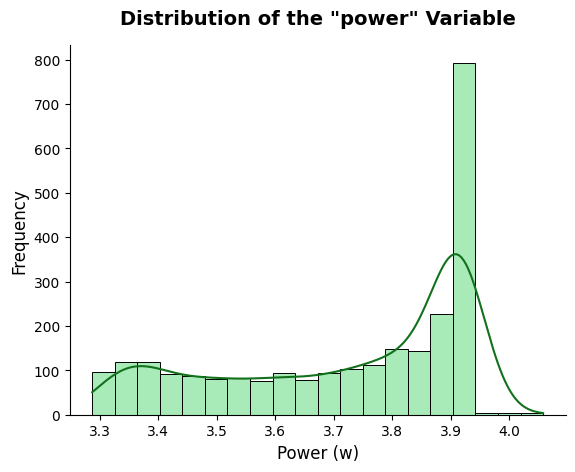

In [40]:
ax = sns.histplot(
    data=df_numeric_types_agg_treated,
    x='power',
    bins=20,
    kde=True,
    color=pastel_colors[2],
    edgecolor='black',
    linewidth=0.7,
    alpha=0.75
)
ax.lines[0].set_color(sns.color_palette("dark")[2])
plt.title('Distribution of the "power" Variable', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Power (w)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine(ax=ax)

plt.show()

In [41]:
df_numeric_types_agg_treated['completion_date'] = df_numeric_types_agg_treated.loc[:, 'completion_date'].apply(np.log10)

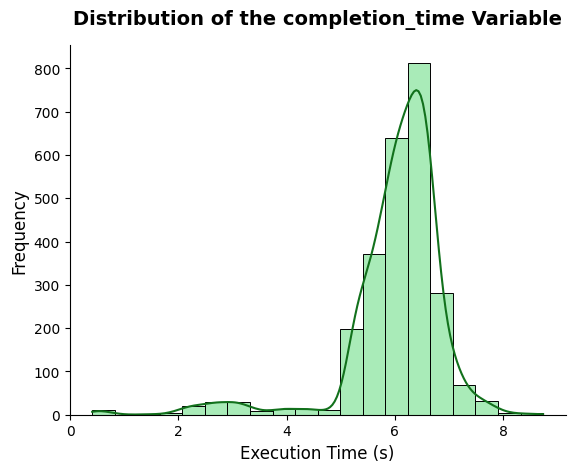

In [42]:
ax = sns.histplot(
    data=df_numeric_types_agg_treated,
    x='completion_date',
    bins=20,
    kde=True,
    color=pastel_colors[2],
    edgecolor='black',
    linewidth=0.7,
    alpha=0.75
)
ax.lines[0].set_color(sns.color_palette("dark")[2])
plt.title('Distribution of the completion_time Variable', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Execution Time (s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine(ax=ax)

plt.show()

# Machine Learning

In [43]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version

from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from packaging.version import parse as parse_version

In [44]:
df_numeric_types_agg_treated.columns

Index(['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed',
       'compute_time', 'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'power', 'completion_date',
       'sum_cores_allocated'],
      dtype='object')

In [45]:
df3 = df_numeric_types_agg_treated.drop(columns=['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed'], axis=1)
df3

,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,power,completion_date,sum_cores_allocated
0,6836.8,298.83456,50.083920,37084.700000,18446744073709551520,18446744073709551520,3.368285,5.249629,3771
1,6836.8,307.73592,14.301540,16153.200000,18446744073709541555,18446744073709541555,3.809203,5.912210,362511
2,6836.8,548.14320,11.870799,15571.400000,18446744073709540745,18446744073709540745,3.921391,5.780723,391671
3,6836.8,401.33520,9.422352,21484.400000,18446744073709545255,18446744073709545255,3.604291,6.073880,229311
4,6836.8,298.83456,19.586880,22403.200000,18446744073709545230,18446744073709545230,3.548577,6.177920,230211
...,...,...,...,...,...,...,...,...,...
2544,6836.8,298.83456,9.422352,12192.300000,18446744073709545305,18446744073709545305,3.805921,5.715122,227511
2545,6836.8,298.83456,34.108236,14899.500000,18446744073709545280,18446744073709545280,3.606540,6.054100,228411
2546,6836.8,298.83456,15.172560,22225.100000,18446744073709545285,18446744073709545285,3.527792,6.221453,228231
2547,6836.8,298.83456,43.016400,16666.700000,18446744073709545280,18446744073709545280,3.703990,5.888391,228411


In [46]:
features = ['total_bytes_read', 'total_bytes_write', 'io_input_time', 'io_output_time']

In [47]:
title_font_size = 18
subtitle_font_size = 18
xylabel_font_size = 18
tick_params_font_size = 18
legends_font_size = 13

## Performance

In [48]:
target = 'completion_date'

### Gradient Boosting Regressor

 Mean Absolute Percentage Error (MAPE) in the test set: 0.0793
Mean Squared Error (MSE) in the test set: 0.3163
Mean Absolute Error (MAE) in the test set: 0.4195
Coefficient of Determination (R2) in the test set: 0.5297


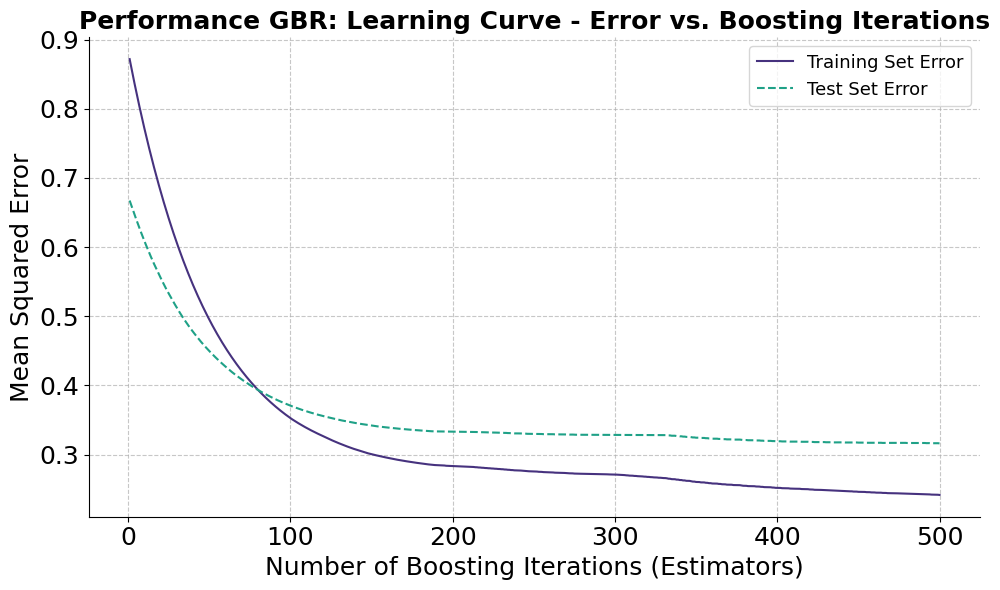

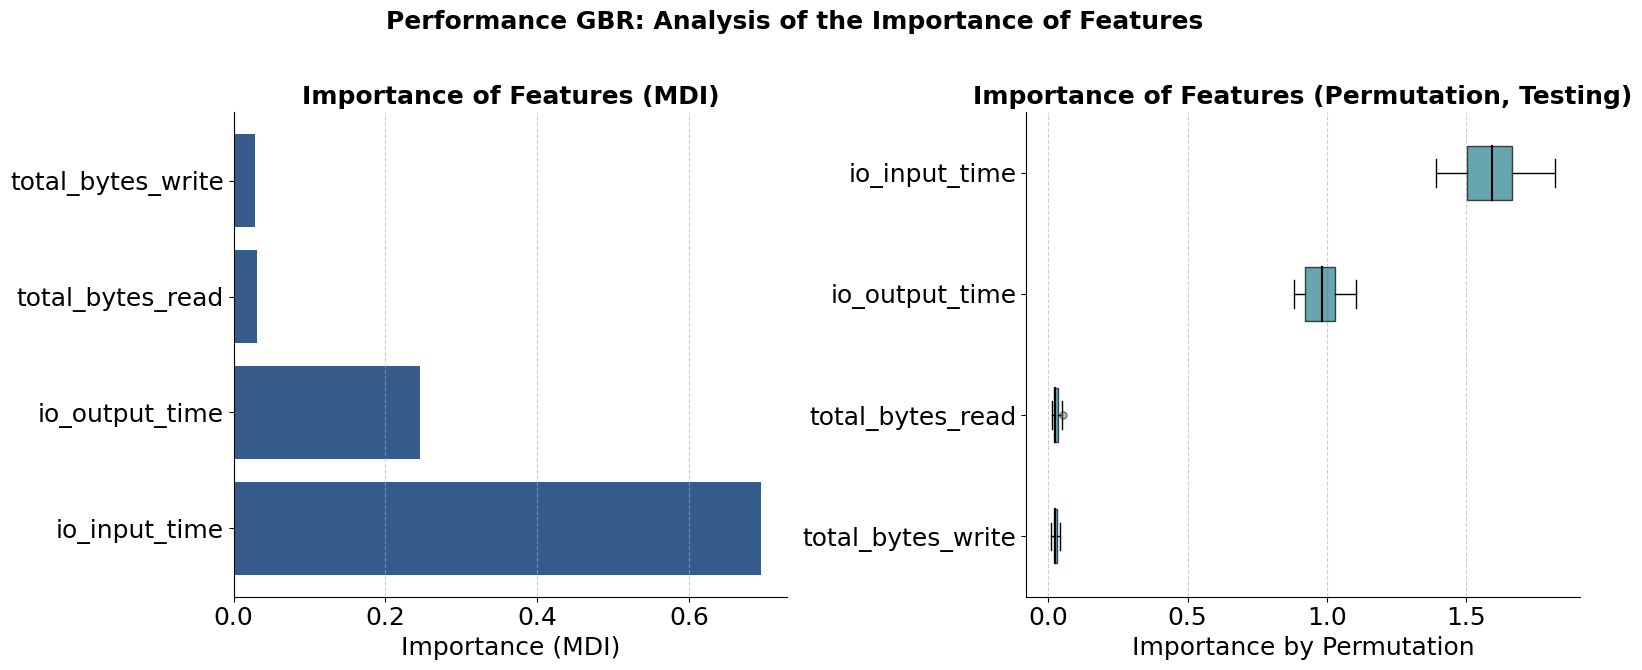

In [49]:
plt.rcParams['legend.fontsize'] = legends_font_size

X_train, X_test, y_train, y_test = train_test_split(
    df3[features], df3[target], test_size=0.1, random_state=12
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gbr_model = ensemble.GradientBoostingRegressor(**params, random_state=12)
gbr_model.fit(X_train, y_train)

y_pred_test = gbr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
coef_determination = r2_score(y_test, y_pred_test)
print(f" Mean Absolute Percentage Error (MAPE) in the test set: {mape_test:.4f}")
print(f"Mean Squared Error (MSE) in the test set: {mse_test:.4f}")
print(f"Mean Absolute Error (MAE) in the test set: {mae_test:.4f}")
print(f"Coefficient of Determination (R2) in the test set: {coef_determination:.4f}")

test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred_staged in enumerate(gbr_model.staged_predict(X_test)):
    test_deviance[i] = mean_squared_error(y_test, y_pred_staged)

fig_deviance, ax_deviance = plt.subplots(figsize=(10, 6))

loss_label = "Mean Squared Error"
if params["loss"] == "absolute_error":
    loss_label = "Mean Absolute Error"
elif params["loss"] == "huber":
    loss_label = "Huber Loss"

ax_deviance.set_title("Performance GBR: Learning Curve - Error vs. Boosting Iterations", fontsize=title_font_size, fontweight='bold')
ax_deviance.plot(
    np.arange(params["n_estimators"]) + 1,
    gbr_model.train_score_,
    color=sns.color_palette("viridis")[0],
    linestyle="-",
    linewidth=1.5,
    label="Training Set Error",
)
ax_deviance.plot(
    np.arange(params["n_estimators"]) + 1,
    test_deviance,
    color=sns.color_palette("viridis")[3],
    linestyle="--",
    linewidth=1.5,
    label="Test Set Error"
)
ax_deviance.legend(loc="upper right", frameon=True)
ax_deviance.set_xlabel("Number of Boosting Iterations (Estimators)", fontsize=xylabel_font_size)
ax_deviance.set_ylabel(loss_label, fontsize=xylabel_font_size)
ax_deviance.grid(True, linestyle='--', alpha=0.7)
sns.despine(fig=fig_deviance, ax=ax_deviance)
ax_deviance.tick_params(labelsize=tick_params_font_size)
fig_deviance.tight_layout()
plt.show()

feature_importance_mdi = gbr_model.feature_importances_
sorted_idx_mdi = np.argsort(feature_importance_mdi)
pos_mdi = np.arange(sorted_idx_mdi.shape[0]) + 0.5

perm_importance_result = permutation_importance(
    gbr_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
sorted_idx_perm = perm_importance_result.importances_mean.argsort()

fig_importance, axes_importance = plt.subplots(1, 2, figsize=(16, 7))

axes_importance[0].barh(
    pos_mdi,
    feature_importance_mdi[sorted_idx_mdi],
    align="center",
    color=sns.color_palette("viridis")[1]
)
axes_importance[0].set_yticks(pos_mdi)
axes_importance[0].set_yticklabels(np.array(features)[sorted_idx_mdi], fontsize=xylabel_font_size)
axes_importance[0].set_xlabel("Importance (MDI)", fontsize=xylabel_font_size)
axes_importance[0].set_title("Importance of Features (MDI)", fontsize=subtitle_font_size, fontweight='bold')
axes_importance[0].invert_yaxis()
sns.despine(ax=axes_importance[0])
axes_importance[0].grid(axis='x', linestyle='--', alpha=0.6)
axes_importance[0].tick_params(axis='x', labelsize=tick_params_font_size)

tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(features)[sorted_idx_perm]
}

axes_importance[1].boxplot(
    perm_importance_result.importances[sorted_idx_perm].T,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor=sns.color_palette("viridis")[2], alpha=0.7),
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black", linewidth=1),
    capprops=dict(color="black", linewidth=1),
    flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none', alpha=0.5),
    **tick_labels_dict
)
axes_importance[1].set_xlabel("Importance by Permutation", fontsize=xylabel_font_size)
axes_importance[1].set_title("Importance of Features (Permutation, Testing)", fontsize=subtitle_font_size, fontweight='bold')
axes_importance[1].tick_params(axis='y', labelsize=xylabel_font_size)
sns.despine(ax=axes_importance[1])
axes_importance[1].grid(axis='x', linestyle='--', alpha=0.6)
axes_importance[1].tick_params(axis='x', labelsize=tick_params_font_size)

fig_importance.suptitle("Performance GBR: Analysis of the Importance of Features", fontsize=title_font_size, fontweight='bold')
fig_importance.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Linear Regressor

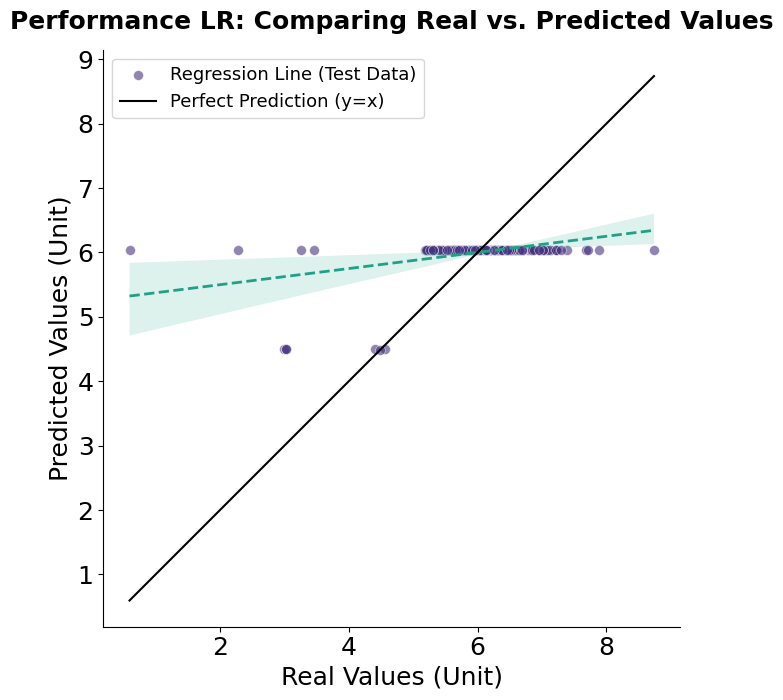

Linear Regression Coefficients: [-3.46081017e-12  3.46081025e-12  7.47096708e-23  4.08889597e-23]
Linear Regression Intercept: 4.4994
Mean Absolute Percentage Error (MAPE) in the test set: 0.1215
Mean Squared Error (MSE) in the test set: 0.5623
Mean Absolute Error (MAE) in the test set: 0.4963
Coefficient of Determination (R2) in the test set: 0.1638


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    df3[features], df3[target], test_size=0.1, random_state=12
)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred_test = lin_reg_model.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
coef_determination = r2_score(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))

palette_choice = sns.color_palette("viridis")
scatter_color = palette_choice[0]
line_color_reg = palette_choice[3]
line_color_identity = 'black'

sns.regplot(
    x=y_test,
    y=y_pred_test,
    ax=ax,
    scatter_kws={
        'alpha': 0.6,
        'color': scatter_color,
        's': 50,
        'edgecolor': 'w',
        'linewidth': 0.5
    },
    line_kws={
        'color': line_color_reg,
        'linewidth': 2,
        'linestyle': '--'
    },
    label="Regression Line (Test Data)"
)

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color=line_color_identity,
    linestyle='-',
    linewidth=1.5,
    label='Perfect Prediction (y=x)'
)

ax.set_title('Performance LR: Comparing Real vs. Predicted Values', fontsize=title_font_size, fontweight='bold', pad=15)
ax.set_xlabel('Real Values (Unit)', fontsize=xylabel_font_size)
ax.set_ylabel('Predicted Values (Unit)', fontsize=xylabel_font_size)

overall_min = min(y_test.min(), y_pred_test.min())
overall_max = max(y_test.max(), y_pred_test.max())
padding = (overall_max - overall_min) * 0.05
ax.set_xlim(overall_min - padding, overall_max + padding)
ax.set_ylim(overall_min - padding, overall_max + padding)
ax.set_aspect('equal', adjustable='box')

ax.legend(loc='upper left', frameon=True, fontsize=legends_font_size)

sns.despine(fig=fig, ax=ax)

plt.tight_layout()
plt.tick_params(labelsize=tick_params_font_size)

plt.show()

print(f"Linear Regression Coefficients: {lin_reg_model.coef_}")
print(f"Linear Regression Intercept: {lin_reg_model.intercept_:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) in the test set: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) in the test set: {mse_test:.4f}")
print(f"Mean Absolute Error (MAE) in the test set: {mae_test:.4f}")
print(f"Coefficient of Determination (R2) in the test set: {coef_determination:.4f}")

### Random Forest

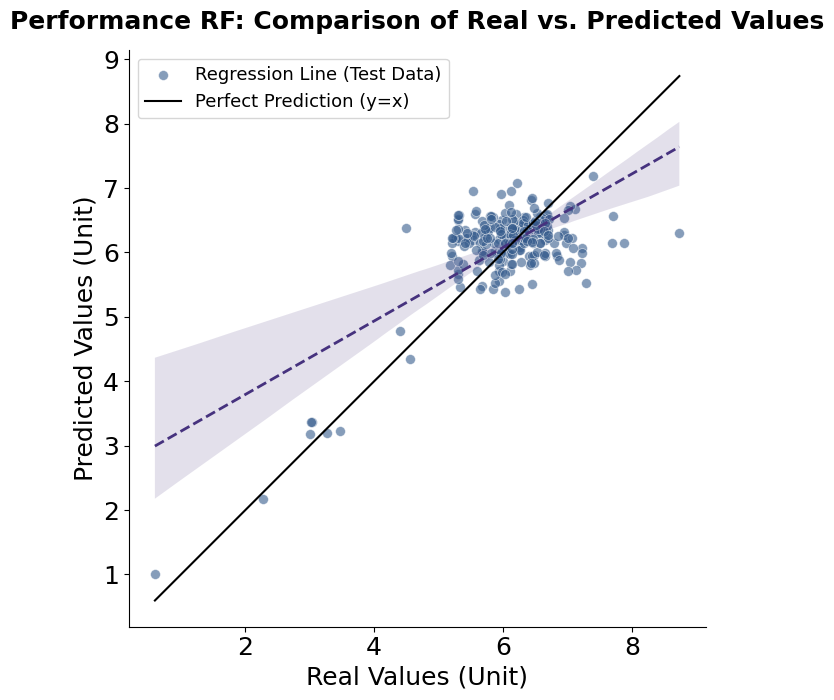

Importance of Features (Random Forest):
  total_bytes_read: 0.0220
  total_bytes_write: 0.0219
  io_input_time: 0.5932
  io_output_time: 0.3628

Mean Absolute Percentage Error (MAPE) in the test set: 0.0766
Mean Squared Error (MSE) in the test set: 0.3524
Mean Absolute Error (MAE) in the test set: 0.4451
Coefficient of Determination (R2) in the test set: 0.4759


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    df3[features], df3[target], test_size=0.1, random_state=12
)

rf_model = RandomForestRegressor(n_estimators=500, random_state=12)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
coef_determination = r2_score(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(7, 7))

palette_choice = sns.color_palette("viridis")
scatter_color_rf = palette_choice[1]
line_color_reg_rf = palette_choice[0]
line_color_identity_rf = 'black'

sns.regplot(
    x=y_test,
    y=y_pred_test,
    ax=ax,
    scatter_kws={
        'alpha': 0.6,
        'color': scatter_color_rf,
        's': 50,
        'edgecolor': 'w',
        'linewidth': 0.5
    },
    line_kws={
        'color': line_color_reg_rf,
        'linewidth': 2,
        'linestyle': '--'
    },
    label="Regression Line (Test Data)"
)

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color=line_color_identity_rf,
    linestyle='-',
    linewidth=1.5,
    label='Perfect Prediction (y=x)'
)

ax.set_title('Performance RF: Comparison of Real vs. Predicted Values', fontsize=title_font_size, fontweight='bold', pad=15)
ax.set_xlabel('Real Values (Unit)', fontsize=xylabel_font_size)
ax.set_ylabel('Predicted Values (Unit)', fontsize=xylabel_font_size)

overall_min = min(y_test.min(), y_pred_test.min())
overall_max = max(y_test.max(), y_pred_test.max())
padding = (overall_max - overall_min) * 0.05
ax.set_xlim(overall_min - padding, overall_max + padding)
ax.set_ylim(overall_min - padding, overall_max + padding)
ax.set_aspect('equal', adjustable='box')

ax.legend(loc='upper left', frameon=True, fontsize=legends_font_size)

sns.despine(fig=fig, ax=ax)

plt.tight_layout()

plt.tick_params(labelsize=tick_params_font_size)
plt.show()

print(f"Importance of Features (Random Forest):")
for feature, importance in zip(features, rf_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

print(f"\nMean Absolute Percentage Error (MAPE) in the test set: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) in the test set: {mse_test:.4f}")
print(f"Mean Absolute Error (MAE) in the test set: {mae_test:.4f}")
print(f"Coefficient of Determination (R2) in the test set: {coef_determination:.4f}")

## Energy

In [52]:
target2 = 'power'

### Gradient Boosting Regressor

 Mean Absolute Percentage Error (MAPE) in the test set: 0.0291
Mean Squared Error (MSE) in the test set: 0.0210
Mean Absolute Error (MAE) in the test set: 0.1050
Coefficient of Determination (R2) in the test set: 0.4714


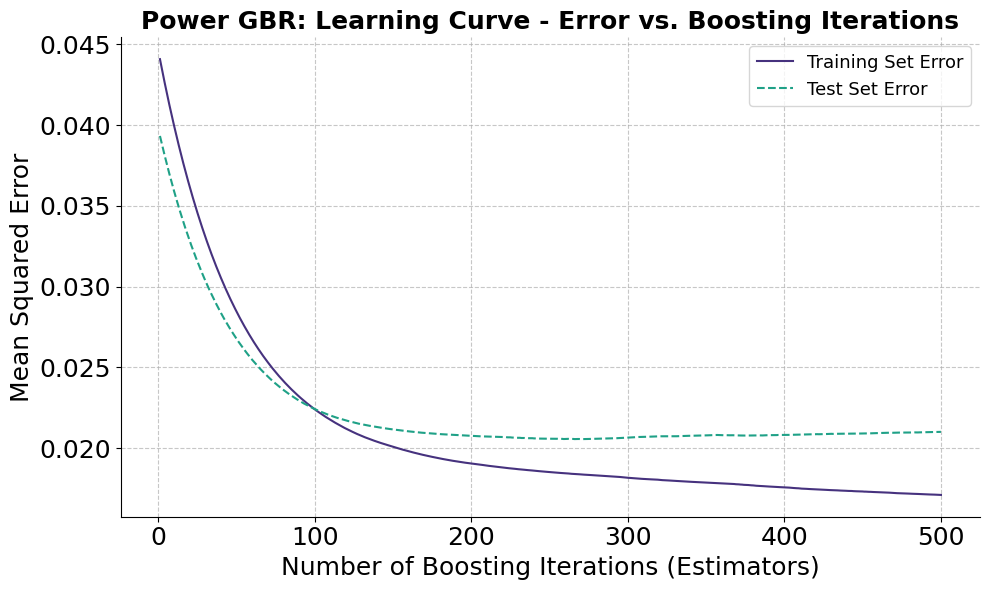

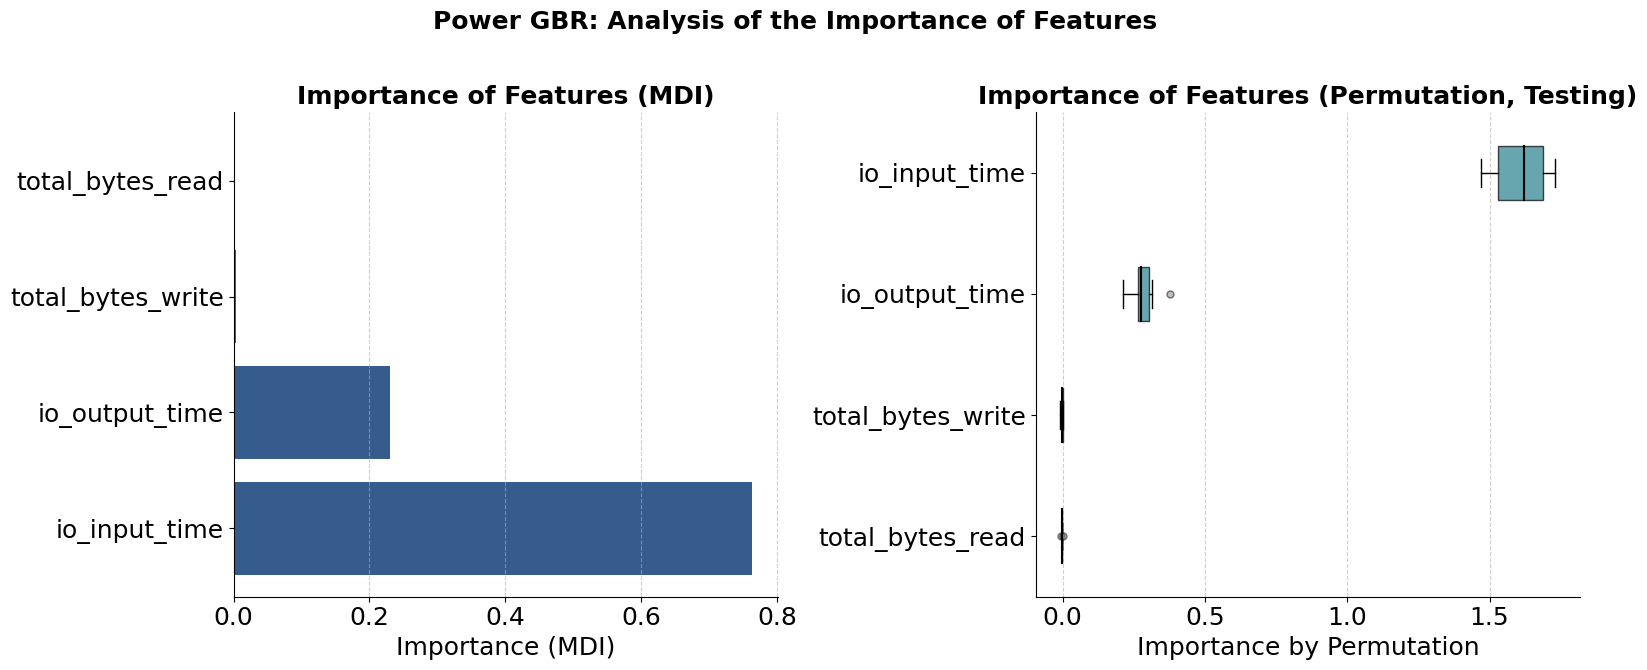

In [53]:
plt.rcParams['legend.fontsize'] = legends_font_size

X_train, X_test, y_train, y_test = train_test_split(
    df3[features], df3[target2], test_size=0.1, random_state=12
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gbr_model = ensemble.GradientBoostingRegressor(**params, random_state=12)
gbr_model.fit(X_train, y_train)

y_pred_test = gbr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
coef_determination = r2_score(y_test, y_pred_test)
print(f" Mean Absolute Percentage Error (MAPE) in the test set: {mape_test:.4f}")
print(f"Mean Squared Error (MSE) in the test set: {mse_test:.4f}")
print(f"Mean Absolute Error (MAE) in the test set: {mae_test:.4f}")
print(f"Coefficient of Determination (R2) in the test set: {coef_determination:.4f}")

test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred_staged in enumerate(gbr_model.staged_predict(X_test)):
    test_deviance[i] = mean_squared_error(y_test, y_pred_staged)

fig_deviance, ax_deviance = plt.subplots(figsize=(10, 6))

loss_label = "Mean Squared Error"
if params["loss"] == "absolute_error":
    loss_label = "Mean Absolute Error"
elif params["loss"] == "huber":
    loss_label = "Huber Loss"

ax_deviance.set_title("Power GBR: Learning Curve - Error vs. Boosting Iterations", fontsize=title_font_size, fontweight='bold')
ax_deviance.plot(
    np.arange(params["n_estimators"]) + 1,
    gbr_model.train_score_,
    color=sns.color_palette("viridis")[0],
    linestyle="-",
    linewidth=1.5,
    label="Training Set Error",
)
ax_deviance.plot(
    np.arange(params["n_estimators"]) + 1,
    test_deviance,
    color=sns.color_palette("viridis")[3],
    linestyle="--",
    linewidth=1.5,
    label="Test Set Error"
)
ax_deviance.legend(loc="upper right", frameon=True)
ax_deviance.set_xlabel("Number of Boosting Iterations (Estimators)", fontsize=xylabel_font_size)
ax_deviance.set_ylabel(loss_label, fontsize=xylabel_font_size)
ax_deviance.grid(True, linestyle='--', alpha=0.7)
sns.despine(fig=fig_deviance, ax=ax_deviance)
ax_deviance.tick_params(labelsize=tick_params_font_size)
fig_deviance.tight_layout()
plt.show()

feature_importance_mdi = gbr_model.feature_importances_
sorted_idx_mdi = np.argsort(feature_importance_mdi)
pos_mdi = np.arange(sorted_idx_mdi.shape[0]) + 0.5

perm_importance_result = permutation_importance(
    gbr_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1 # n_jobs=-1 para usar todos os cores
)
sorted_idx_perm = perm_importance_result.importances_mean.argsort()

fig_importance, axes_importance = plt.subplots(1, 2, figsize=(16, 7))

axes_importance[0].barh(
    pos_mdi,
    feature_importance_mdi[sorted_idx_mdi],
    align="center",
    color=sns.color_palette("viridis")[1]
)
axes_importance[0].set_yticks(pos_mdi)
axes_importance[0].set_yticklabels(np.array(features)[sorted_idx_mdi], fontsize=xylabel_font_size)
axes_importance[0].set_xlabel("Importance (MDI)", fontsize=xylabel_font_size)
axes_importance[0].set_title("Importance of Features (MDI)", fontsize=subtitle_font_size, fontweight='bold')
axes_importance[0].invert_yaxis()
sns.despine(ax=axes_importance[0])
axes_importance[0].grid(axis='x', linestyle='--', alpha=0.6)
axes_importance[0].tick_params(labelsize=tick_params_font_size)

tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(features)[sorted_idx_perm]
}

axes_importance[1].boxplot(
    perm_importance_result.importances[sorted_idx_perm].T,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor=sns.color_palette("viridis")[2], alpha=0.7),
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black", linewidth=1),
    capprops=dict(color="black", linewidth=1),
    flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none', alpha=0.5),
    **tick_labels_dict
)
axes_importance[1].set_xlabel("Importance by Permutation", fontsize=xylabel_font_size)
axes_importance[1].set_title("Importance of Features (Permutation, Testing)", fontsize=subtitle_font_size, fontweight='bold')
axes_importance[1].tick_params(axis='y', labelsize=xylabel_font_size)
sns.despine(ax=axes_importance[1])
axes_importance[1].grid(axis='x', linestyle='--', alpha=0.6)
axes_importance[1].tick_params(labelsize=tick_params_font_size)

fig_importance.suptitle("Power GBR: Analysis of the Importance of Features", fontsize=title_font_size, fontweight='bold')
fig_importance.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

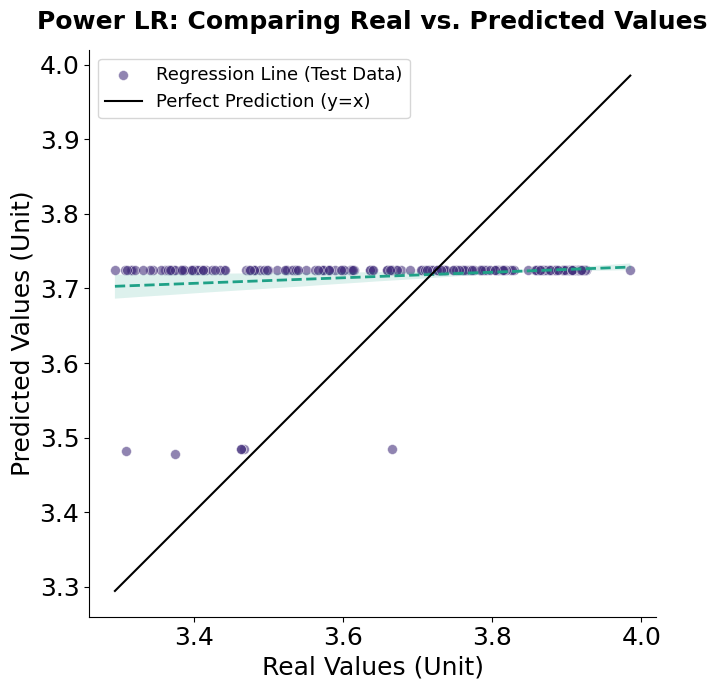

Linear Regression Coefficients: [-2.46080580e-12  2.46080581e-12  5.31222403e-23  2.90740559e-23]
Linear Regression Intercept: 3.4852
Mean Absolute Percentage Error (MAPE) in the test set: 0.0460
Mean Squared Error (MSE) in the test set: 0.0381
Mean Absolute Error (MAE) in the test set: 0.1680
Coefficient of Determination (R2) in the test set: 0.0411


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    df3[features], df3[target2], test_size=0.1, random_state=12
)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred_test = lin_reg_model.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
coef_determination = r2_score(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))

palette_choice = sns.color_palette("viridis")
scatter_color = palette_choice[0]
line_color_reg = palette_choice[3]
line_color_identity = 'black'

sns.regplot(
    x=y_test,
    y=y_pred_test,
    ax=ax,
    scatter_kws={
        'alpha': 0.6,
        'color': scatter_color,
        's': 50,
        'edgecolor': 'w',
        'linewidth': 0.5
    },
    line_kws={
        'color': line_color_reg,
        'linewidth': 2,
        'linestyle': '--'
    },
    label="Regression Line (Test Data)"
)

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color=line_color_identity,
    linestyle='-',
    linewidth=1.5,
    label='Perfect Prediction (y=x)'
)

ax.set_title('Power LR: Comparing Real vs. Predicted Values', fontsize=title_font_size, fontweight='bold', pad=15)
ax.set_xlabel('Real Values (Unit)', fontsize=xylabel_font_size)
ax.set_ylabel('Predicted Values (Unit)', fontsize=xylabel_font_size)

overall_min = min(y_test.min(), y_pred_test.min())
overall_max = max(y_test.max(), y_pred_test.max())
padding = (overall_max - overall_min) * 0.05
ax.set_xlim(overall_min - padding, overall_max + padding)
ax.set_ylim(overall_min - padding, overall_max + padding)
ax.set_aspect('equal', adjustable='box')

ax.legend(loc='upper left', frameon=True, fontsize=legends_font_size)

sns.despine(fig=fig, ax=ax)

plt.tick_params(labelsize=tick_params_font_size)
plt.tight_layout()

plt.show()

print(f"Linear Regression Coefficients: {lin_reg_model.coef_}")
print(f"Linear Regression Intercept: {lin_reg_model.intercept_:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) in the test set: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) in the test set: {mse_test:.4f}")
print(f"Mean Absolute Error (MAE) in the test set: {mae_test:.4f}")
print(f"Coefficient of Determination (R2) in the test set: {coef_determination:.4f}")

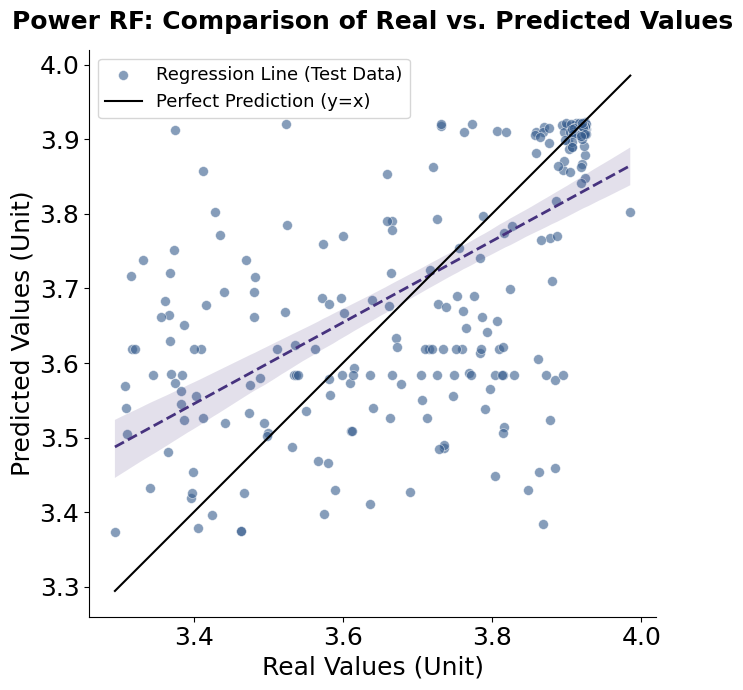

Importance of Features (Random Forest):
  total_bytes_read: 0.0040
  total_bytes_write: 0.0025
  io_input_time: 0.5588
  io_output_time: 0.4347

Mean Absolute Percentage Error (MAPE) in the test set: 0.0309
Mean Squared Error (MSE) in the test set: 0.0257
Mean Absolute Error (MAE) in the test set: 0.1116
Coefficient of Determination (R2) in the test set: 0.3538


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    df3[features], df3[target2], test_size=0.1, random_state=12
)

rf_model = RandomForestRegressor(n_estimators=500, random_state=12)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
coef_determination = r2_score(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(7, 7))

palette_choice = sns.color_palette("viridis")
scatter_color_rf = palette_choice[1]
line_color_reg_rf = palette_choice[0]
line_color_identity_rf = 'black'

sns.regplot(
    x=y_test,
    y=y_pred_test,
    ax=ax,
    scatter_kws={
        'alpha': 0.6,
        'color': scatter_color_rf,
        's': 50,
        'edgecolor': 'w',
        'linewidth': 0.5
    },
    line_kws={
        'color': line_color_reg_rf,
        'linewidth': 2,
        'linestyle': '--'
    },
    label="Regression Line (Test Data)"
)

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color=line_color_identity_rf,
    linestyle='-',
    linewidth=1.5,
    label='Perfect Prediction (y=x)'
)

ax.set_title('Power RF: Comparison of Real vs. Predicted Values', fontsize=title_font_size, fontweight='bold', pad=15)
ax.set_xlabel('Real Values (Unit)', fontsize=xylabel_font_size)
ax.set_ylabel('Predicted Values (Unit)', fontsize=xylabel_font_size)

overall_min = min(y_test.min(), y_pred_test.min())
overall_max = max(y_test.max(), y_pred_test.max())
padding = (overall_max - overall_min) * 0.05
ax.set_xlim(overall_min - padding, overall_max + padding)
ax.set_ylim(overall_min - padding, overall_max + padding)
ax.set_aspect('equal', adjustable='box')

ax.legend(loc='upper left', frameon=True, fontsize=legends_font_size)

sns.despine(fig=fig, ax=ax)

plt.tick_params(labelsize=tick_params_font_size)
plt.tight_layout()

plt.show()

print(f"Importance of Features (Random Forest):")
for feature, importance in zip(features, rf_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

print(f"\nMean Absolute Percentage Error (MAPE) in the test set: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) in the test set: {mse_test:.4f}")
print(f"Mean Absolute Error (MAE) in the test set: {mae_test:.4f}")
print(f"Coefficient of Determination (R2) in the test set: {coef_determination:.4f}")